# **Práctica 9: Pronóstico (Precio de las acciones)**


Nombre: Monroy Mendoza Angel Damian

Número de cuenta:316040707

Email: adamianmm@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Generar un modelo de pronóstico de las acciones de una determinada empresa a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
import yfinance as yf

In [3]:
# Para Bachoco
DataBC = yf.Ticker('IBA') #Ticker es un atributo de yfinance 

In [4]:
BCHist = DataBC.history(start = '2018-1-1', end = '2022-11-20', interval='1d')
BCHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.177087,52.896835,52.177087,52.732841,7700,0.0,0
2018-01-03 00:00:00-05:00,52.896830,53.525468,52.896830,53.097263,3300,0.0,0
2018-01-04 00:00:00-05:00,53.625691,53.698575,52.486851,52.805725,13700,0.0,0
2018-01-05 00:00:00-05:00,52.751068,53.479925,52.751068,53.124607,3700,0.0,0
2018-01-08 00:00:00-05:00,53.106379,53.379699,52.741948,53.370590,46900,0.0,0
...,...,...,...,...,...,...,...
2022-11-14 00:00:00-05:00,50.000000,50.849998,49.950001,50.849998,13800,0.0,0
2022-11-15 00:00:00-05:00,51.310001,53.490002,51.310001,53.439999,12100,0.0,0
2022-11-16 00:00:00-05:00,53.529999,54.240002,53.000000,53.020000,5300,0.0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
BCHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-01-02 00:00:00-05:00 to 2022-11-18 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1231 non-null   float64
 1   High          1231 non-null   float64
 2   Low           1231 non-null   float64
 3   Close         1231 non-null   float64
 4   Volume        1231 non-null   int64  
 5   Dividends     1231 non-null   float64
 6   Stock Splits  1231 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 76.9 KB


In [6]:
BCHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.0
mean,44.214652,44.722657,43.648844,44.199783,10651.259139,0.003466,0.0
std,6.396712,6.408803,6.400375,6.425949,12007.035050,0.038567,0.0
min,27.072739,28.136816,26.404163,26.997408,600.000000,0.000000,0.0
25%,39.851068,40.389751,39.327840,39.886162,4400.000000,0.000000,0.0
50%,43.835125,44.258116,43.267871,43.812336,7200.000000,0.000000,0.0
75%,48.806264,49.201174,48.250345,48.787436,12450.000000,0.000000,0.0
max,58.308597,58.709471,57.515966,58.162827,168200.000000,0.489000,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

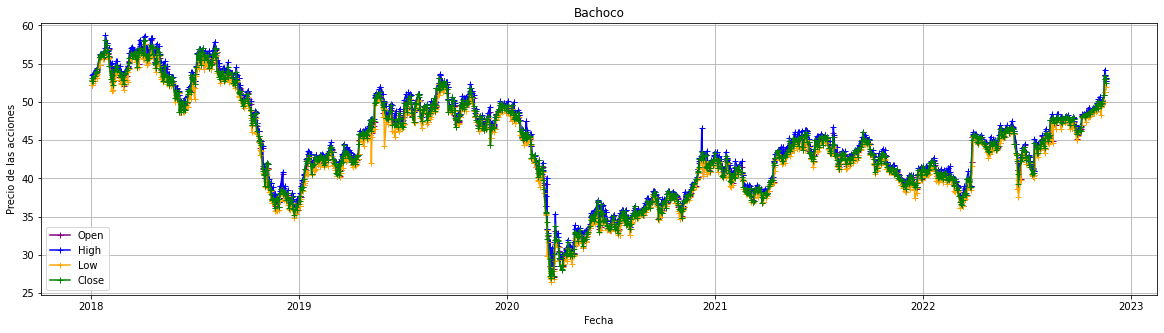

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(BCHist['Open'], color='purple', marker='+', label='Open')
plt.plot(BCHist['High'], color='blue', marker='+', label='High')
plt.plot(BCHist['Low'], color='orange', marker='+', label='Low')
plt.plot(BCHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Bachoco')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
MDatos = BCHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2018-01-02 00:00:00-05:00,52.177087,52.896835,52.177087,52.732841
2018-01-03 00:00:00-05:00,52.896830,53.525468,52.896830,53.097263
2018-01-04 00:00:00-05:00,53.625691,53.698575,52.486851,52.805725
2018-01-05 00:00:00-05:00,52.751068,53.479925,52.751068,53.124607
2018-01-08 00:00:00-05:00,53.106379,53.379699,52.741948,53.370590
...,...,...,...,...
2022-11-14 00:00:00-05:00,50.000000,50.849998,49.950001,50.849998
2022-11-15 00:00:00-05:00,51.310001,53.490002,51.310001,53.439999
2022-11-16 00:00:00-05:00,53.529999,54.240002,53.000000,53.020000


In [9]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2018-01-02 00:00:00-05:00,52.177087,52.896835,52.177087,52.732841
2018-01-03 00:00:00-05:00,52.896830,53.525468,52.896830,53.097263
2018-01-04 00:00:00-05:00,53.625691,53.698575,52.486851,52.805725
2018-01-05 00:00:00-05:00,52.751068,53.479925,52.751068,53.124607
2018-01-08 00:00:00-05:00,53.106379,53.379699,52.741948,53.370590
...,...,...,...,...
2022-11-14 00:00:00-05:00,50.000000,50.849998,49.950001,50.849998
2022-11-15 00:00:00-05:00,51.310001,53.490002,51.310001,53.439999
2022-11-16 00:00:00-05:00,53.529999,54.240002,53.000000,53.020000


### Aplicación del algoritmo

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [11]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,52.177087,52.896835,52.177087
1,52.896830,53.525468,52.896830
2,53.625691,53.698575,52.486851
3,52.751068,53.479925,52.751068
4,53.106379,53.379699,52.741948
...,...,...,...
1226,50.000000,50.849998,49.950001
1227,51.310001,53.490002,51.310001
1228,53.529999,54.240002,53.000000
1229,53.090000,53.110001,51.990002


In [12]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,52.732841
1,53.097263
2,52.805725
3,53.124607
4,53.370590
...,...
1226,50.849998
1227,53.439999
1228,53.020000
1229,53.060001


Se hace la división de los datos

In [13]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [14]:
pd.DataFrame(X_test)

,0,1,2
0,57.707283,57.771057,56.869095
1,47.380725,50.862409,46.409965
2,49.051099,49.107600,47.318444
3,45.062460,46.021856,44.965553
4,39.160160,39.160160,38.250595
...,...,...,...
242,36.189443,36.352677,35.901388
243,52.732989,52.732989,51.612414
244,42.837537,42.886437,41.624787
245,42.300566,43.095216,42.155202


Se entrena el modelo a través de Regresión Lineal Múltiple

In [15]:
RLMultiple = linear_model.LinearRegression()
RLMultiple.fit(X_train, Y_train)

LinearRegression()

In [16]:
#Se genera el pronóstico
Y_Pronostico = RLMultiple.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,57.171546
1,49.413168
2,47.975731
3,45.672868
4,38.542632
...,...
242,36.074245
243,51.980634
244,42.073058
245,42.755988


In [17]:
r2_score(Y_test, Y_Pronostico)

0.9967859032579017

In [18]:
print('Coeficientes: \n', RLMultiple.coef_)
print('Intercepto: \n', RLMultiple.intercept_)
print("Residuo: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_test, Y_Pronostico))

Coeficientes: 
 [[-0.37611111  0.77304581  0.60249838]]
Intercepto: 
 [-0.04731583]
Residuo: 0.2755
MSE: 0.1279
RMSE: 0.3577
Score (Bondad de ajuste): 0.9968


#### **Conformación del modelo de pronóstico**

Y = 0.168 - 0.647(Open) + 0.812(High) + 0.835(Low) + 0.7601

* Se tiene un Score de 0.9989, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 1.171 y 1.082 unidades del valor real, esto es, MSE y RMSE, respectivamente.

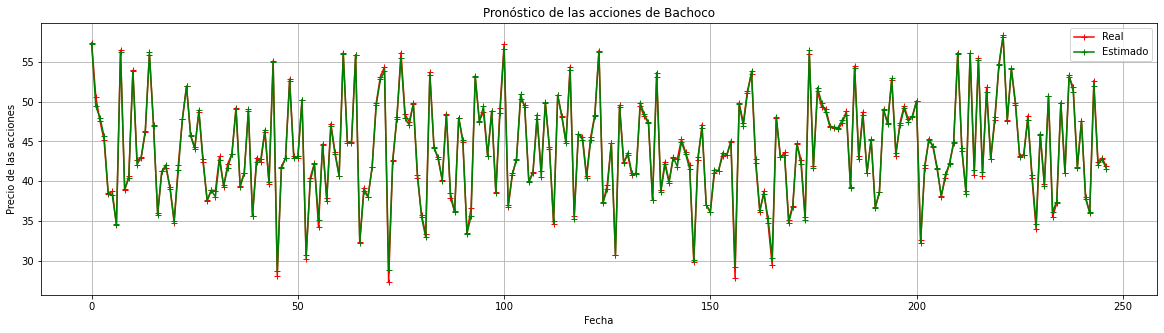

In [19]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Bachoco')
plt.grid(True)
plt.legend()
plt.show()

#### **Nuevos pronósticos**

In [20]:
PrecioAccion = pd.DataFrame({'Open': [118.2],
                             'High': [122.2], 
                             'Low': [110.8]})
RLMultiple.predict(PrecioAccion)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[116.71936957]])

#### **SEGUNDO MODELO**

Conservando la columna de 'Volumen'

In [21]:
M2Datos = BCHist.drop(columns = [ 'Dividends', 'Stock Splits'])
M2Datos

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02 00:00:00-05:00,52.177087,52.896835,52.177087,52.732841,7700
2018-01-03 00:00:00-05:00,52.896830,53.525468,52.896830,53.097263,3300
2018-01-04 00:00:00-05:00,53.625691,53.698575,52.486851,52.805725,13700
2018-01-05 00:00:00-05:00,52.751068,53.479925,52.751068,53.124607,3700
2018-01-08 00:00:00-05:00,53.106379,53.379699,52.741948,53.370590,46900
...,...,...,...,...,...
2022-11-14 00:00:00-05:00,50.000000,50.849998,49.950001,50.849998,13800
2022-11-15 00:00:00-05:00,51.310001,53.490002,51.310001,53.439999,12100
2022-11-16 00:00:00-05:00,53.529999,54.240002,53.000000,53.020000,5300


In [22]:
# En caso de tener valores nulos
M2Datos = M2Datos.dropna()
M2Datos


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02 00:00:00-05:00,52.177087,52.896835,52.177087,52.732841,7700
2018-01-03 00:00:00-05:00,52.896830,53.525468,52.896830,53.097263,3300
2018-01-04 00:00:00-05:00,53.625691,53.698575,52.486851,52.805725,13700
2018-01-05 00:00:00-05:00,52.751068,53.479925,52.751068,53.124607,3700
2018-01-08 00:00:00-05:00,53.106379,53.379699,52.741948,53.370590,46900
...,...,...,...,...,...
2022-11-14 00:00:00-05:00,50.000000,50.849998,49.950001,50.849998,13800
2022-11-15 00:00:00-05:00,51.310001,53.490002,51.310001,53.439999,12100
2022-11-16 00:00:00-05:00,53.529999,54.240002,53.000000,53.020000,5300


### Aplicación del algoritmo

In [23]:
X2 = np.array(M2Datos[['Open',
                     'High',
                     'Low',
                     'Volume']])
pd.DataFrame(X2)

,0,1,2,3
0,52.177087,52.896835,52.177087,7700.0
1,52.896830,53.525468,52.896830,3300.0
2,53.625691,53.698575,52.486851,13700.0
3,52.751068,53.479925,52.751068,3700.0
4,53.106379,53.379699,52.741948,46900.0
...,...,...,...,...
1226,50.000000,50.849998,49.950001,13800.0
1227,51.310001,53.490002,51.310001,12100.0
1228,53.529999,54.240002,53.000000,5300.0
1229,53.090000,53.110001,51.990002,20600.0


In [24]:
Y2 = np.array(M2Datos[['Close']])
pd.DataFrame(Y2)

,0
0,52.732841
1,53.097263
2,52.805725
3,53.124607
4,53.370590
...,...
1226,50.849998
1227,53.439999
1228,53.020000
1229,53.060001


In [25]:
X_train2, X_test2, Y_train2, Y_test2 = model_selection.train_test_split(X2, Y2, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [26]:
pd.DataFrame(X_test2)

,0,1,2,3
0,57.707283,57.771057,56.869095,5300.0
1,47.380725,50.862409,46.409965,10700.0
2,49.051099,49.107600,47.318444,6000.0
3,45.062460,46.021856,44.965553,3300.0
4,39.160160,39.160160,38.250595,12000.0
...,...,...,...,...
242,36.189443,36.352677,35.901388,7700.0
243,52.732989,52.732989,51.612414,3700.0
244,42.837537,42.886437,41.624787,7200.0
245,42.300566,43.095216,42.155202,5000.0


In [27]:
RLMultiple2 = linear_model.LinearRegression()
RLMultiple2.fit(X_train2, Y_train2)

LinearRegression()

In [28]:
#Se genera el pronóstico
Y_Pronostico2 = RLMultiple2.predict(X_test2)
pd.DataFrame(Y_Pronostico2)

,0
0,57.171231
1,49.399899
2,47.969940
3,45.667737
4,38.543143
...,...
242,36.072887
243,51.976921
244,42.069140
245,42.751993


In [29]:
r2_score(Y_test2, Y_Pronostico2)

0.9967961736507596

In [30]:
print('Coeficientes: \n', RLMultiple2.coef_)
print('Intercepto: \n', RLMultiple2.intercept_)
print("Residuo: %.4f" % mean_absolute_error(Y_test2, Y_Pronostico2))
print("MSE: %.4f" % mean_squared_error(Y_test2, Y_Pronostico2))
print("RMSE: %.4f" % mean_squared_error(Y_test2, Y_Pronostico2, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_test2, Y_Pronostico2))

Coeficientes: 
 [[-3.76267516e-01  7.68910005e-01  6.07021723e-01  7.71802377e-07]]
Intercepto: 
 [-0.06100346]
Residuo: 0.2751
MSE: 0.1275
RMSE: 0.3571
Score (Bondad de ajuste): 0.9968


#### **Conformación del modelo de pronóstico**

Y = -0.06100351 - -3.76267512e-01(Open) + 7.68910007e-01(High) + 6.07021718e-01(Low) + 7.71802387e-07(Volume)  + 0.2751

* Se tiene un Score de 0.9968, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 0.1275 y 0.3571 unidades del valor real, esto es, MSE y RMSE, respectivamente.

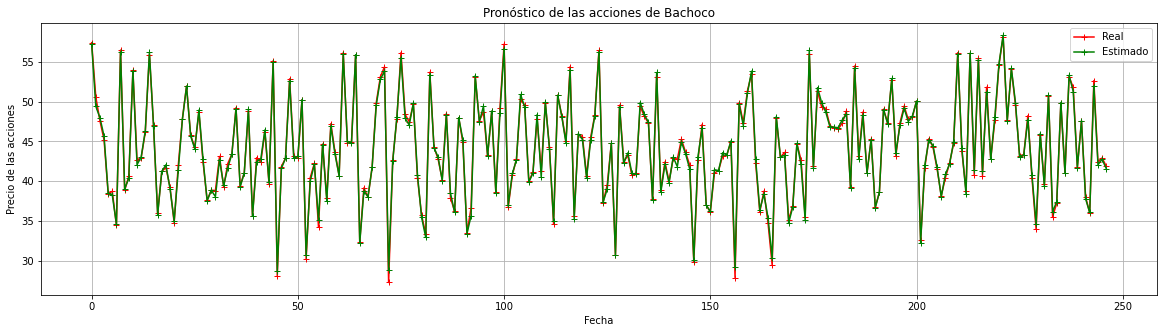

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test2, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico2, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Bachoco')
plt.grid(True)
plt.legend()
plt.show()

In [32]:
PrecioAccion2 = pd.DataFrame({'Open': [52.2],
                             'High': [52.7], 
                             'Low': [52.5],
                             'Volume': [168200]})
RLMultiple2.predict(PrecioAccion2)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[52.81784709]])